In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC

import warnings
# suppress some MDAnalysis warnings about PSF files
#warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt


In [2]:
scratchdir = '/home/jvilla/scratch'  # lavandula
scratchdir = '/home/jordivilla/scratchdir'  # laptop

In [3]:
# some information
u = mda.Universe(scratchdir+'/tre5.parm7',scratchdir+'/mdtre5.nc')
print(u)
print(hasattr(u, 'trajectory'))
print(len(u.trajectory))
print(u.residues)
print(u.atoms)
print(u.select_atoms('resname UNL').n_atoms)
print(u.select_atoms('resid 1').n_atoms)
print(u.atoms[:45].names)

<Universe with 25105 atoms>
True
2780
<ResidueGroup [<Residue UNL, 1>, <Residue UNL, 2>, <Residue UNL, 3>, ..., <Residue WAT, 6223>, <Residue WAT, 6224>, <Residue WAT, 6225>]>
<AtomGroup [<Atom 1: C of type CT of resname UNL, resid 1 and segid SYSTEM>, <Atom 2: O1 of type OS of resname UNL, resid 1 and segid SYSTEM>, <Atom 3: C3 of type CT of resname UNL, resid 1 and segid SYSTEM>, ..., <Atom 25103: H1 of type HW of resname WAT, resid 6225 and segid SYSTEM>, <Atom 25104: H2 of type HW of resname WAT, resid 6225 and segid SYSTEM>, <Atom 25105: EPW of type EP of resname WAT, resid 6225 and segid SYSTEM>]>
225
45
['C' 'O1' 'C3' 'C6' 'C4' 'C1' 'O2' 'H5' 'H1' 'O4' 'H10' 'H4' 'O6' 'H14'
 'H7' 'C7' 'O7' 'H15' 'H8' 'H9' 'H3' 'H' 'O' 'C2' 'O3' 'C8' 'C10' 'C9'
 'C5' 'O5' 'H13' 'H6' 'O8' 'H19' 'H12' 'O9' 'H20' 'H16' 'C11' 'O10' 'H21'
 'H17' 'H18' 'H11' 'H2']


/home/jordivilla/miniconda3/envs/mdanalysis/lib/python3.9/site-packages/MDAnalysis/topology/TOPParser.py:306: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)


visualize trajectory

In [4]:
import nglview as nv
view = nv.show_mdanalysis(u.select_atoms('resid 1-5'))
view

NGLWidget(max_frame=2779)

In [9]:
tre = u.select_atoms('resid 1-5')
print(tre.names)
print(tre.center_of_mass())

['C' 'O1' 'C3' 'C6' 'C4' 'C1' 'O2' 'H5' 'H1' 'O4' 'H10' 'H4' 'O6' 'H14'
 'H7' 'C7' 'O7' 'H15' 'H8' 'H9' 'H3' 'H' 'O' 'C2' 'O3' 'C8' 'C10' 'C9'
 'C5' 'O5' 'H13' 'H6' 'O8' 'H19' 'H12' 'O9' 'H20' 'H16' 'C11' 'O10' 'H21'
 'H17' 'H18' 'H11' 'H2' 'C' 'O1' 'C3' 'C6' 'C4' 'C1' 'O2' 'H5' 'H1' 'O4'
 'H10' 'H4' 'O6' 'H14' 'H7' 'C7' 'O7' 'H15' 'H8' 'H9' 'H3' 'H' 'O' 'C2'
 'O3' 'C8' 'C10' 'C9' 'C5' 'O5' 'H13' 'H6' 'O8' 'H19' 'H12' 'O9' 'H20'
 'H16' 'C11' 'O10' 'H21' 'H17' 'H18' 'H11' 'H2' 'C' 'O1' 'C3' 'C6' 'C4'
 'C1' 'O2' 'H5' 'H1' 'O4' 'H10' 'H4' 'O6' 'H14' 'H7' 'C7' 'O7' 'H15' 'H8'
 'H9' 'H3' 'H' 'O' 'C2' 'O3' 'C8' 'C10' 'C9' 'C5' 'O5' 'H13' 'H6' 'O8'
 'H19' 'H12' 'O9' 'H20' 'H16' 'C11' 'O10' 'H21' 'H17' 'H18' 'H11' 'H2' 'C'
 'O1' 'C3' 'C6' 'C4' 'C1' 'O2' 'H5' 'H1' 'O4' 'H10' 'H4' 'O6' 'H14' 'H7'
 'C7' 'O7' 'H15' 'H8' 'H9' 'H3' 'H' 'O' 'C2' 'O3' 'C8' 'C10' 'C9' 'C5'
 'O5' 'H13' 'H6' 'O8' 'H19' 'H12' 'O9' 'H20' 'H16' 'C11' 'O10' 'H21' 'H17'
 'H18' 'H11' 'H2' 'C' 'O1' 'C3' 'C6' 'C4' 'C1' 'O2' 'H5'

In [10]:
for ts in u.trajectory[:20]:
    time = u.trajectory.time
    rgyr = u.atoms.radius_of_gyration()
    print("Frame: {:3d}, Time: {:5.1f} ps, Rgyr: {:.4f} A".format(ts.frame, time, rgyr))

Frame:   0, Time: 100.2 ps, Rgyr: 27.5316 A
Frame:   1, Time: 100.4 ps, Rgyr: 27.5659 A
Frame:   2, Time: 100.6 ps, Rgyr: 27.5910 A
Frame:   3, Time: 100.8 ps, Rgyr: 27.6160 A
Frame:   4, Time: 101.0 ps, Rgyr: 27.6441 A
Frame:   5, Time: 101.2 ps, Rgyr: 27.6537 A
Frame:   6, Time: 101.4 ps, Rgyr: 27.6613 A
Frame:   7, Time: 101.6 ps, Rgyr: 27.6535 A
Frame:   8, Time: 101.8 ps, Rgyr: 27.6490 A
Frame:   9, Time: 102.0 ps, Rgyr: 27.6503 A
Frame:  10, Time: 102.2 ps, Rgyr: 27.6613 A
Frame:  11, Time: 102.4 ps, Rgyr: 27.6673 A
Frame:  12, Time: 102.6 ps, Rgyr: 27.6754 A
Frame:  13, Time: 102.8 ps, Rgyr: 27.6674 A
Frame:  14, Time: 103.0 ps, Rgyr: 27.6583 A
Frame:  15, Time: 103.2 ps, Rgyr: 27.6472 A
Frame:  16, Time: 103.4 ps, Rgyr: 27.6310 A
Frame:  17, Time: 103.6 ps, Rgyr: 27.6084 A
Frame:  18, Time: 103.8 ps, Rgyr: 27.6057 A
Frame:  19, Time: 104.0 ps, Rgyr: 27.6016 A


collect data in a list first

In [11]:
rgyr = []
time = []

for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(tre.radius_of_gyration())

now transform intoa  pandas dataframe and plot

In [12]:
import pandas as pd
rgyr_df = pd.DataFrame(rgyr, columns=['Radius of gyration (A)'], index=time)
rgyr_df.index.name = 'Time (ps)'

rgyr_df.head()

,Radius of gyration (A)
Time (ps),
100.199997,17.501620
100.400002,17.413751
100.599998,17.388268
100.800003,17.453600
101.000000,17.583515


<Axes: title={'center': 'Radius of gyration'}, xlabel='Time (ps)'>

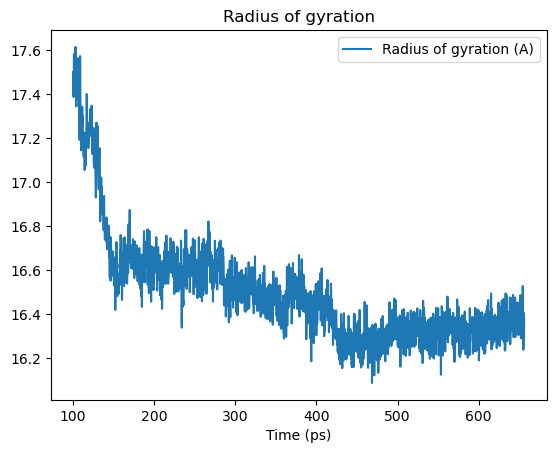

In [13]:
%matplotlib inline

rgyr_df.plot(title='Radius of gyration')

test the change in RMSD from the first to the last snapshot in the trajectory

In [14]:
from MDAnalysis.analysis import rms


u.trajectory[0] # first frame
first = tre.positions


u.trajectory[-1] #last frame
last = tre.positions

print(first,last)

rms.rmsd(first, last)

[[19.438534  27.56875   47.345043 ]
 [18.071146  27.984715  47.04056  ]
 [17.070013  26.9462    47.15795  ]
 [17.100859  26.282318  48.555454 ]
 [18.54541   25.939653  49.07438  ]
 [19.499115  27.116001  48.798542 ]
 [20.80601   26.718468  49.130547 ]
 [20.827278  25.773005  48.96548  ]
 [19.233295  27.999603  49.37879  ]
 [18.384779  25.928951  50.48584  ]
 [19.151112  25.522291  50.89689  ]
 [18.897974  25.004278  48.639782 ]
 [16.338715  25.032888  48.53977  ]
 [16.50677   24.60227   49.381153 ]
 [16.628656  27.00421   49.221786 ]
 [15.719279  27.609425  46.80025  ]
 [15.607445  28.764961  47.558865 ]
 [16.369608  29.31173   47.354534 ]
 [15.619042  27.737825  45.722492 ]
 [14.919717  26.925655  47.08532  ]
 [17.250881  26.199417  46.38484  ]
 [20.191586  28.338026  47.174076 ]
 [19.719769  26.479374  46.4507   ]
 [19.775234  26.841192  45.076252 ]
 [21.235447  27.092258  44.893078 ]
 [22.123657  25.959688  44.89515  ]
 [21.777464  24.77261   44.085236 ]
 [20.277351  24.438034  44.2

7.148581149372705

now run a complete RMSD plot

The results are stored in the `.rmsd` attribute. This is an array with the shape `(n_frames, 2 + n_selections)`.

(2780, 5)


/home/jordivilla/miniconda3/envs/mdanalysis/lib/python3.9/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


<Axes: title={'center': 'RMSD'}, xlabel='Time (ps)'>

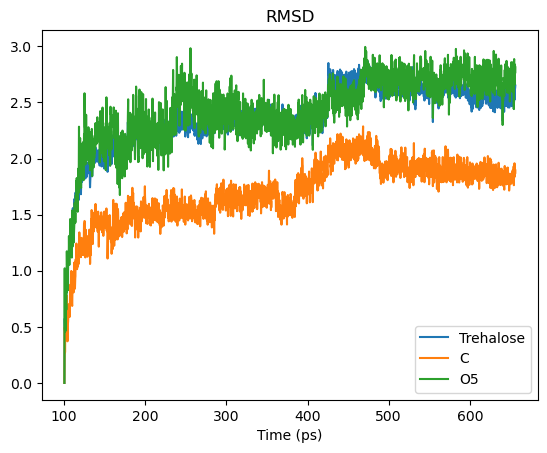

In [15]:
u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='resid 1-5', groupselections=['name C', 'name O5'])
rmsd_analysis.run()
print(rmsd_analysis.rmsd.shape)

rmsd_df = pd.DataFrame(rmsd_analysis.rmsd[:, 2:],
                       columns=['Trehalose', 'C', 'O5'],
                       index=rmsd_analysis.rmsd[:, 1])
rmsd_df.index.name = 'Time (ps)'
rmsd_df.head()
rmsd_df.plot(title='RMSD')

